In [ ]:
from sklearn.module import Model
model = Model()
model.fit(X,y)
predictions = model.predict(X_new)
predictions

In [81]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv('telecom_churn_clean.csv')
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [82]:
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values

# X = churn_df.drop("churn", axis=1).values
# y = churn_df["churn"].values

print(X.shape, y.shape)
# Pandas DataFrame.values attribute return a Numpy representation of the given DataFrame

(3333, 2) (3333,)


# k-Nearest Neighbors, KNN, classification
Predict the label of any data point by looking at the k, for example, three, closest labeled data points and getting them to vote on what label the unlabeled observation should have

In [83]:
from sklearn.neighbors import KNeighborsClassifier 
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X,y)
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions)) 

Predictions: [1 0 0]


# Train/test split

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21, stratify=y)

# stratify - to ensure our split reflects the proportion of labels in our data

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

# Measuring model performance - classification
Accuracy (tp+tn)/(tp+tn+fp+fn)

In [34]:
accuracy = knn.score(X_test, y_test)
print("Accuracy: {}".format(accuracy)) 

Accuracy: 0.872


Confusion matrix

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[836,  19],
       [109,  36]], dtype=int64)

In [89]:
c=classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       855
           1       0.65      0.25      0.36       145

    accuracy                           0.87      1000
   macro avg       0.77      0.61      0.64      1000
weighted avg       0.85      0.87      0.85      1000



precision tp/(tp+fp)

recall = sensitivity tp/(tp+fn)

F1 score = precision * recall / (precision +recall)

# Over/underfitting

In [41]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


<function matplotlib.pyplot.show(close=None, block=None)>

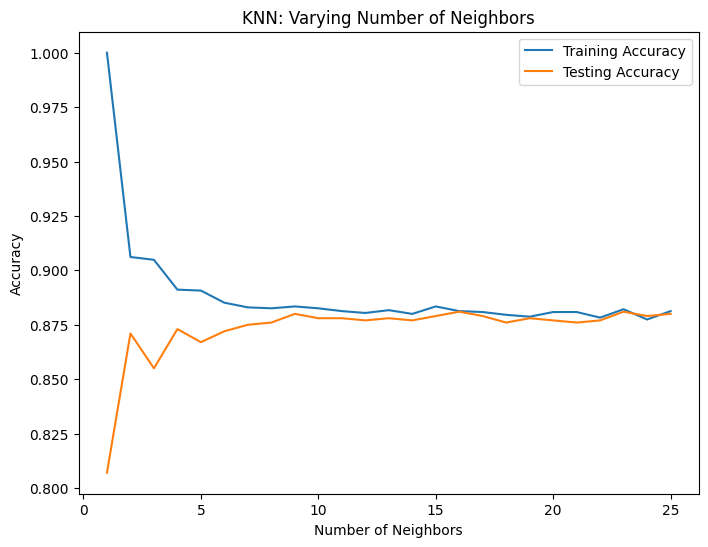

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# Regression

In [45]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
X_bmi = X[:,3]
print(y.shape, X_bmi.shape)
X_bmi = X_bmi.reshape(-1,1)
print(y.shape, X_bmi.shape)
# X has to be as a two-dimensional array

(768,) (768,)
(768,) (768, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

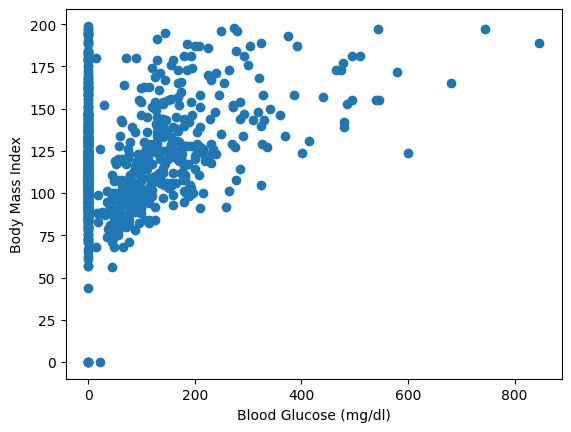

In [50]:
plt.scatter(X_bmi,y)
plt.xlabel("Blood Glucose (mg/dl)")
plt.ylabel("Body Mass Index")
plt.show

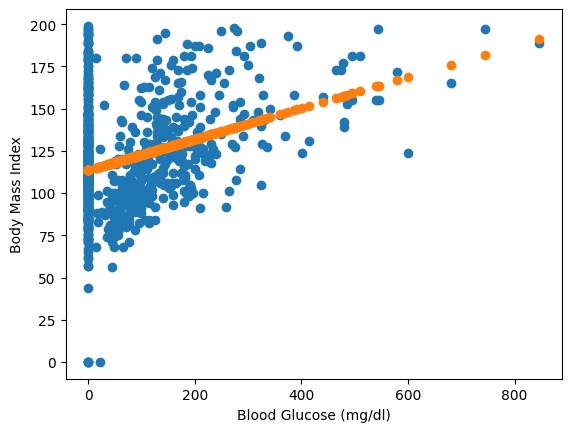

In [53]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_bmi,y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi,y)
plt.scatter(X_bmi,predictions)
plt.xlabel("Blood Glucose (mg/dl)")
plt.ylabel("Body Mass Index")
plt.show()

In [56]:
# Linear regression using all features
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
predictions = reg_all.predict(X_test)

# Measuring model performance - regression
R square

In [58]:
reg_all.score(X_test,y_test)

0.28701582460171704

MSE, RMSE

In [66]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,predictions, squared = True)

RMSE = mean_squared_error(y_test,predictions, squared = False)
print(f'MSE: {MSE}, RMSE: {RMSE}')

MSE: 636.8297799182925, RMSE: 25.235486520340608


# Cross-validation, k-fold CV

In [70]:
from sklearn.model_selection import cross_val_score, KFold
# KFold - for shuffle data
# shuffle = True - it shuffles data before spliting
# reported score = R squared, to change "scoring='neg_mean_absolute_error"
kf = KFold(n_splits=6,shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y,cv=kf)
print(cv_results)
print(f'Mean: {np.mean(cv_results)}, Std: {np.std(cv_results)}')
print(f'(95% confidence: {np.quantile(cv_results, [0.025,0.975])})')

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
Mean: 0.3190969786734479, Std: 0.0701532061011419
(95% confidence: [0.24088592 0.41580685])


# Regularized regression
- a technique used to avoid overfitting

Ridge L2
- change the loss function so that it penalizes large coefficients
- alfa (you can choose) * coefficient squared + loss function

In [72]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train,y_train)
    predictions = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
scores

[0.28718210812881373,
 0.2886488453855751,
 0.30075083865691343,
 0.3266444676302307,
 0.2903861817405353]

Lasso L1
- alfa (you can choose) * |coefficient| + loss function
- it tends to shrink the coefficients of less important features to zero

In [73]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train,y_train)
    predictions = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
scores

[0.28761806147817415,
 0.3298222738388288,
 0.2621354084106098,
 0.2437901341500236,
 0.19875769891921435]

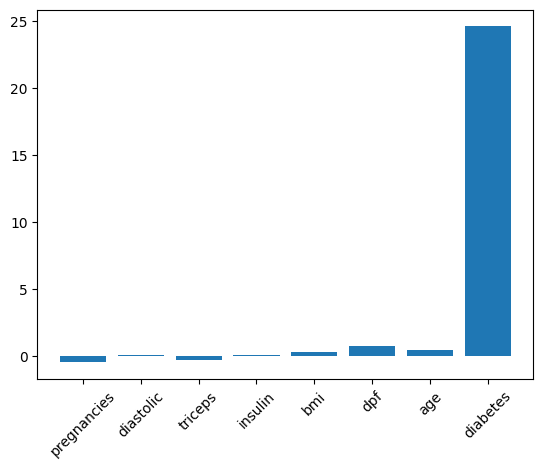

In [77]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha = 0.1)
lasso.fit(X,y)
lasso_coef = lasso.coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# Logistic regression, classification
- This model calculates the probability

In [94]:
from sklearn.linear_model import LogisticRegression

# random_state=30, max_iter=500
log_reg = LogisticRegression(max_iter=10000)

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
pred_probability = log_reg.predict_proba(X_test)

# ROC curve
- to visualize how different thresholds affect true positive and false positive rates
- fpr = FP/(FP+TN)
- tpr = recall = TP(TP+FP)

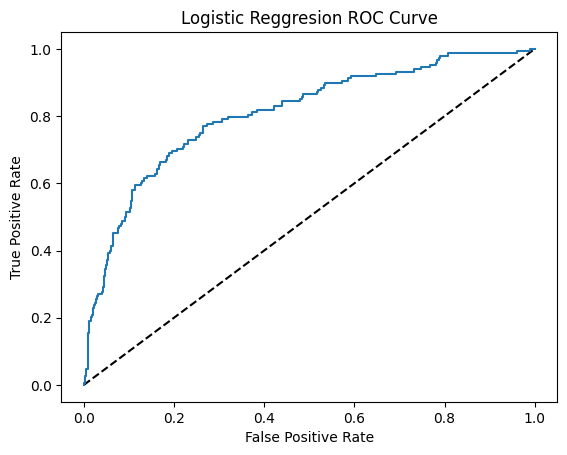

In [113]:
from sklearn.metrics import roc_curve
fpr, tpr, treshold = roc_curve(y_test, pred_probability[:,1])
# roc_curve(y_test, pred_probability[:,1]) - probability of 1  
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Reggresion ROC Curve')
plt.show()

AUC
- we calculate the area under the ROC curve
- 0 to 1

In [99]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_probability[:,1])

0.8078368861819565

# Hyperparameter tuning
- KNN, we choose n_neighbors
- choose a value for alpha in ridge and lasso regression

# GridSearchCV

In [128]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5,shuffle=True, random_state=42)
param_grid = {'alpha':np.arange(0.0001,1,10),
         'solver': ['sag', 'lsqr']}
ridge = Ridge(max_iter=500000)
ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv = kf)
ridge_cv.fit(X_train, y_train)

print("The best parameters are: ", ridge_cv.best_params_)
print("The best score is: ", ridge_cv.best_score_)



The best parameters are:  {'alpha': 0.0001, 'solver': 'sag'}
The best score is:  0.13574603561009424


# RandomizedSearchCV

In [130]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5,shuffle=True, random_state=42)
param_grid = {'alpha':np.arange(0.0001,1,10),
         'solver': ['sag', 'lsqr']}
ridge = Ridge(max_iter=500000)
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv = kf, n_iter = 2)
ridge_cv.fit(X_train, y_train)

print("The best parameters are: ", ridge_cv.best_params_)
print("The best score is: ", ridge_cv.best_score_)



The best parameters are:  {'solver': 'sag', 'alpha': 0.0001}
The best score is:  0.13574797588837526


In [132]:
test_score = ridge_cv.score(X_test,y_test)
print(test_score)

0.1579436780258443


# Dummy variable
- scikit-learn: OneHotEncoder
- pandas: get_dummies
- manual

In [138]:
music_df = pd.read_csv('music_clean.csv')

In [ ]:
music_dummies = pd.get_dummies(music_df['genre'], drop_first = True) # each genre own column
music_dummies = pd.concat([music_df, music_dummies], axis =1) # add to rest of the file

In [ ]:
music_dummies = music_dummies.drop('genre', axis = 1)

In [ ]:
# one categorical feature
music_dummies = pd.get_dummies(music_df, drop_first = True)

In [ ]:
# manual
music_dummies['genre'] = np.where(music_df['genre'] = 'Rock',1,0)
# if it is Rock convert to 1 other case to 0

# Missing data
- to remove missing observations accounting for less than 5% of all data
- to impute missing data by mean, median, for categorical by moda

In [146]:
# identifying how many row is missing
print(music_df.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [ ]:
music_df = music_df.dropna(subset = ['popularity','energy', 'tempo' ])

In [ ]:
from sklearn.impute import SimpleImputer
X_cat = music_df['genre'].values.reshape(-1,1)
X_num = music_df.drop(['genre', 'popularity'], axis = 1).values
y = music_df['popularity'].values
X_train_cat ,X_test_cat ,y_train,y_test = train_test_split(X_cat,y,test_size=0.2,random_state=12)
X_train_num ,X_test_num ,y_train,y_test = train_test_split(X_num,y,test_size=0.2,random_state=12)

imp_cat = SimpleImputer(strategy = 'most_frequent')
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

imp_num = SimpleImputer() # mean by deafult
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

X_train = np.append(X_train_cat,X_train_num, axis = 1)
X_test = np.append(X_test_cat,X_test_num, axis = 1)

# Pipline

In [ ]:
from sklearn.pipeline import Pipeline
steps = [('imputation', SimpleImpute()),
        ('logistic_regression', LogisticRegression())]
pipeline = Pipeline(steps)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)